q2 part3
# Data preprocessing

In [1]:
import pandas as pd
import numpy as np

In [2]:
!gdown 1-AlW7oNJHaqi3xk_9dWHUS52Dzl_FmFW

Downloading...
From (original): https://drive.google.com/uc?id=1-AlW7oNJHaqi3xk_9dWHUS52Dzl_FmFW
From (redirected): https://drive.google.com/uc?id=1-AlW7oNJHaqi3xk_9dWHUS52Dzl_FmFW&confirm=t&uuid=b8e731af-e2a2-45e5-b6c4-018879281123
To: /content/train_data.csv
100% 635M/635M [00:09<00:00, 65.2MB/s]


In [3]:
traindf = pd.read_csv("/content/train_data.csv")

<ipython-input-3-5e4155aca592>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  traindf = pd.read_csv("/content/train_data.csv")


- text preprocessing

In [4]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
# from spellchecker import SpellChecker
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import string
import nltk
import re

In [5]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [6]:
def text_preprocesser(review):

    url_mention_pattern = r"(?:\@|https?\://)\S+"
    slash = r'\\'
    enter = r'\n'
    non_ASCII = r'[^\x00-\x7f]'
    custom_chars = r'\Ã\±\ã\¼\â\»\§'

    unwanteds_pattern = [url_mention_pattern, custom_chars, non_ASCII, enter, slash]

    for pattern in unwanteds_pattern:
        review = re.sub(pattern, "", review)

    review = re.sub(r"\d+", "<NUMBER>", review)
    review = review.lower()

    verbs = "wouldn't wouldn't won't will weren't weren were wasn't wasn was shouldn't shouldn should've should needn't mustn't mustn mightn it's is isn isn isn't have haven't haven having has hasn hasn't hasn had hadn't hadn been can couldn couldn did didn didn't do does doesn't does doin doing don don't are aren aren't"
    stop_words = set(stopwords.words('english'))
    stop_words = stop_words.difference(set(verbs.split(" ")))

    punctuation = set(string.punctuation)
    review = review.lower()

    tokenizer = RegexpTokenizer(r'\w+')
    words = tokenizer.tokenize(review)
    words = [word for word in words if word not in stop_words and word not in punctuation]

    # spell = SpellChecker()
    # words = [spell.correction(word) for word in words]

    lem = WordNetLemmatizer()
    words = [lem.lemmatize(word) if word is not None else '' for word in words]

    return words

In [7]:
traindf['preped'] = traindf['reviewText'].apply(text_preprocesser)

In [8]:
max_sequence_length = 100
max_vocab_size = 1000
tokenizer = Tokenizer(num_words=max_vocab_size)
tokenizer.fit_on_texts(traindf['reviewText'])

In [9]:
traindf['prep'] = tokenizer.texts_to_sequences(traindf['preped'])

In [10]:
newtrain = traindf[['prep', 'overall']]

In [ ]:
newtrain.to_csv("newtrain.csv", index=False)

- Balancing Data

In [ ]:
!pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 2.0 MB/s eta 0:00:00


In [11]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [ ]:
newtrain = pd.read_csv('/content/newtrain.csv')

In [12]:
max_len  = 100

X = pad_sequences(newtrain['prep'].tolist(), padding="post", maxlen=max_len)

In [ ]:
newtrain['overall'].value_counts()

overall
5    461485
4    156514
1     82950
3     81239
2     56756
Name: count, dtype: int64

<Axes: >

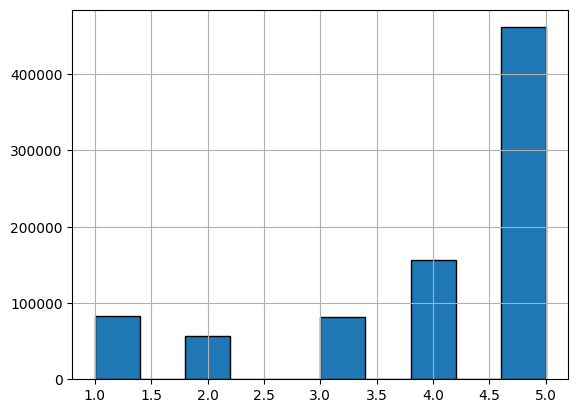

In [ ]:
newtrain['overall'].hist(edgecolor="black", align='mid')

**for balancing the data i gonna try tree way:**
- **Under sampling + Over sampling**
- **Under sampling + SMOTE**
- **Under sampling**

In [15]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf

Under sampling + Over sampling

In [ ]:
undersampler = RandomUnderSampler(sampling_strategy={1: 82950, 2: 56756, 3: 81239, 4: 90000, 5: 90000}, random_state=42)
oversampler = RandomOverSampler(sampling_strategy={1: 90000, 2: 90000, 3: 90000, 4: 90000, 5: 90000}, random_state=42)

Xrs, yrs = undersampler.fit_resample(X , newtrain['overall'])
Xuo, yuo = oversampler.fit_resample(Xrs, yrs)

In [ ]:
yuo.value_counts()

overall
1    90000
2    90000
3    90000
4    90000
5    90000
Name: count, dtype: int64

In [ ]:
yuo_encoded = to_categorical(yuo-1)

Under sampling + SMOTE

In [13]:
undersampler = RandomUnderSampler(sampling_strategy={1: 82950, 2: 56756, 3: 81239, 4: 90000, 5: 90000}, random_state=42)
smote = SMOTE(sampling_strategy={1: 90000, 2: 90000, 3: 90000, 4: 90000, 5: 90000}, random_state=42)

Xrs, yrs = undersampler.fit_resample(X, newtrain['overall'])
Xus, yus = smote.fit_resample(Xrs, yrs)

In [ ]:
yus.value_counts()

overall
1    90000
2    90000
3    90000
4    90000
5    90000
Name: count, dtype: int64

In [16]:
yus_encoded = to_categorical(yus-1)

Under sampling

In [ ]:
undersampler = RandomUnderSampler(random_state=42)

Xu, yu = undersampler.fit_resample(X, newtrain['overall'])

In [ ]:
yu.value_counts()

overall
1    56756
2    56756
3    56756
4    56756
5    56756
Name: count, dtype: int64

In [ ]:
yu_encoded = to_categorical(yu-1)

# Base Models

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense, Conv1D
from tensorflow.keras import regularizers
from sklearn.metrics import accuracy_score, f1_score, classification_report

testing Under sampling + Over sampling data

In [ ]:
X_train_UO, X_val_UO, y_train_UO, y_val_UO = train_test_split(Xuo, yuo_encoded, test_size=0.22, random_state=42)

In [ ]:
model_1 = Sequential()
model_1.add(Embedding(input_dim=1000, output_dim=64, input_length=100))
model_1.add(LSTM(128, return_sequences=True, kernel_regularizer=regularizers.L2(1e-4)))
model_1.add(Dropout(0.2))
model_1.add(LSTM(256, kernel_regularizer=regularizers.L2(1e-4)))
model_1.add(Dropout(0.3))
model_1.add(Dense(5, activation='softmax'))

model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           64000     
                                                                 
 lstm (LSTM)                 (None, 100, 128)          98816     
                                                                 
 dropout (Dropout)           (None, 100, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 256)               394240    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense (Dense)               (None, 5)                 1285      
                                                                 
Total params: 558341 (2.13 MB)
Trainable params: 558341 

In [ ]:
history_UO = model_1.fit(X_train_UO, y_train_UO,
          validation_split=0.15,
          epochs=10,
          batch_size=128)


Epoch 1/10
2331/2331 [==============================] - 71s 28ms/step - loss: 1.6039 - accuracy: 0.2198 - val_loss: 1.5686 - val_accuracy: 0.2767
Epoch 2/10
2331/2331 [==============================] - 56s 24ms/step - loss: 1.5976 - accuracy: 0.2272 - val_loss: 1.5972 - val_accuracy: 0.2256
Epoch 3/10
2331/2331 [==============================] - 56s 24ms/step - loss: 1.6042 - accuracy: 0.2106 - val_loss: 1.6109 - val_accuracy: 0.2007
Epoch 4/10
2331/2331 [==============================] - 54s 23ms/step - loss: 1.6103 - accuracy: 0.2009 - val_loss: 1.6102 - val_accuracy: 0.2002
Epoch 5/10
2331/2331 [==============================] - 57s 24ms/step - loss: 1.6099 - accuracy: 0.1987 - val_loss: 1.6095 - val_accuracy: 0.2002
Epoch 6/10
2331/2331 [==============================] - 56s 24ms/step - loss: 1.6114 - accuracy: 0.2008 - val_loss: 1.6099 - val_accuracy: 0.1995
Epoch 7/10
2331/2331 [==============================] - 57s 25ms/step - loss: 1.6099 - accuracy: 0.2008 - val_loss: 1.6098 -

In [ ]:
score_uo = model_1.evaluate(X_val_UO, y_val_UO, verbose=1)

y_pred_uo = model_1.predict(X_val_UO, verbose=1)
y_pred_uo_arg = np.argmax(y_pred_uo, axis=1)

original_y = np.argmax(y_val_UO+1, axis=1)

acc = accuracy_score(original_y, y_pred_uo_arg)
print("Accuracy: {:.2f}".format(acc))

f1 = f1_score(original_y, y_pred_uo_arg, average='micro')
print("F1: {:.2f}".format(f1))

print("Classification Report:")
print(classification_report(original_y, y_pred_uo_arg))

3094/3094 [==============================] - 15s 5ms/step
Accuracy: 0.39
F1: 0.39
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.63      0.54     19843
           1       0.31      0.20      0.24     19761
           2       0.29      0.24      0.26     19835
           3       0.27      0.16      0.20     19709
           4       0.43      0.69      0.53     19852

    accuracy                           0.39     99000
   macro avg       0.36      0.38      0.36     99000
weighted avg       0.36      0.39      0.36     99000



testing Under sampling + SMOTE data

In [17]:
X_train_US, X_val_US, y_train_US, y_val_US = train_test_split(Xus, yus_encoded, test_size=0.22, random_state=42)

In [ ]:
history_US = model_1.fit(X_train_US, y_train_US,
          validation_split=0.15,
          epochs=10,
          batch_size=128)


Epoch 1/10
2331/2331 [==============================] - 84s 33ms/step - loss: 1.6029 - accuracy: 0.2265 - val_loss: 1.6127 - val_accuracy: 0.2062
Epoch 2/10
2331/2331 [==============================] - 57s 25ms/step - loss: 1.6049 - accuracy: 0.2136 - val_loss: 1.5854 - val_accuracy: 0.2450
Epoch 3/10
2331/2331 [==============================] - 53s 23ms/step - loss: 1.6065 - accuracy: 0.2087 - val_loss: 1.6106 - val_accuracy: 0.1990
Epoch 4/10
2331/2331 [==============================] - 54s 23ms/step - loss: 1.6104 - accuracy: 0.2003 - val_loss: 1.6097 - val_accuracy: 0.2007
Epoch 5/10
2331/2331 [==============================] - 55s 24ms/step - loss: 1.6098 - accuracy: 0.2006 - val_loss: 1.6101 - val_accuracy: 0.2007
Epoch 6/10
2331/2331 [==============================] - 54s 23ms/step - loss: 1.4351 - accuracy: 0.3310 - val_loss: 1.2800 - val_accuracy: 0.4357
Epoch 7/10
2331/2331 [==============================] - 54s 23ms/step - loss: 1.2697 - accuracy: 0.4426 - val_loss: 1.2819 -

In [ ]:
score_us = model_1.evaluate(X_val_US, y_val_US, verbose=1)

y_pred_us = model_1.predict(X_val_US, verbose=1)
y_pred_us_arg = np.argmax(y_pred_us, axis=1)

original_y = np.argmax(y_val_US+1, axis=1)

acc = accuracy_score(original_y, y_pred_us_arg)
print("Accuracy: {:.2f}".format(acc))

f1 = f1_score(original_y, y_pred_us_arg, average='micro')
print("F1: {:.2f}".format(f1))

print("Classification Report:")
print(classification_report(original_y, y_pred_us_arg))

3094/3094 [==============================] - 17s 5ms/step
Accuracy: 0.50
F1: 0.50
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.66      0.60     19843
           1       0.58      0.42      0.48     19761
           2       0.35      0.49      0.41     19835
           3       0.48      0.38      0.42     19709
           4       0.67      0.57      0.62     19852

    accuracy                           0.50     99000
   macro avg       0.52      0.50      0.51     99000
weighted avg       0.52      0.50      0.51     99000



testing Under sampling only data

In [ ]:
X_train_U, X_val_U, y_train_U, y_val_U = train_test_split(Xu, yu_encoded, test_size=0.22, random_state=42)

In [ ]:
history_U = model_1.fit(X_train_U, y_train_U,
          validation_split=0.15,
          epochs=10,
          batch_size=128)


Epoch 1/10
1470/1470 [==============================] - 36s 24ms/step - loss: 1.3349 - accuracy: 0.3896 - val_loss: 1.3175 - val_accuracy: 0.4059
Epoch 2/10
1470/1470 [==============================] - 34s 23ms/step - loss: 1.2925 - accuracy: 0.4325 - val_loss: 1.2576 - val_accuracy: 0.4534
Epoch 3/10
1470/1470 [==============================] - 34s 23ms/step - loss: 1.2541 - accuracy: 0.4582 - val_loss: 1.2735 - val_accuracy: 0.4557
Epoch 4/10
1470/1470 [==============================] - 34s 23ms/step - loss: 1.2353 - accuracy: 0.4677 - val_loss: 1.2330 - val_accuracy: 0.4676
Epoch 5/10
1470/1470 [==============================] - 34s 23ms/step - loss: 1.2268 - accuracy: 0.4716 - val_loss: 1.2564 - val_accuracy: 0.4530
Epoch 6/10
1470/1470 [==============================] - 34s 23ms/step - loss: 1.2174 - accuracy: 0.4767 - val_loss: 1.2273 - val_accuracy: 0.4731
Epoch 7/10
1470/1470 [==============================] - 34s 23ms/step - loss: 1.2107 - accuracy: 0.4787 - val_loss: 1.2422 -

In [ ]:
score_u = model_1.evaluate(X_val_U, y_val_U, verbose=1)

y_pred_u = model_1.predict(X_val_U, verbose=1)
y_pred_u_arg = np.argmax(y_pred_u, axis=1)

original_y = np.argmax(y_val_U+1, axis=1)

acc = accuracy_score(original_y, y_pred_u_arg)
print("Accuracy: {:.2f}".format(acc))

f1 = f1_score(original_y, y_pred_u_arg, average='micro')
print("F1: {:.2f}".format(f1))

print("Classification Report:")
print(classification_report(original_y, y_pred_u_arg))

1951/1951 [==============================] - 9s 5ms/step
Accuracy: 0.48
F1: 0.48
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.69      0.59     12486
           1       0.36      0.27      0.31     12382
           2       0.39      0.29      0.33     12435
           3       0.47      0.42      0.44     12446
           4       0.55      0.71      0.62     12683

    accuracy                           0.48     62432
   macro avg       0.46      0.47      0.46     62432
weighted avg       0.46      0.48      0.46     62432



secound base model

In [ ]:
model_2 = Sequential()
model_2.add(Embedding(input_dim=max_vocab_size, output_dim=64, input_length=max_sequence_length))
model_2.add(LSTM(256))
model_2.add(Dropout(0.1))
model_2.add(Dense(5, activation = "sigmoid"))

model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 64)           64000     
                                                                 
 lstm_2 (LSTM)               (None, 256)               328704    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 393989 (1.50 MB)
Trainable params: 393989 (1.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history2_US = model_2.fit(X_train_US, y_train_US,
          validation_split=0.15,
          epochs=10,
          batch_size=64)

Epoch 1/10
4662/4662 [==============================] - 85s 18ms/step - loss: 1.5671 - accuracy: 0.2532 - val_loss: 1.4591 - val_accuracy: 0.3503
Epoch 2/10
4662/4662 [==============================] - 52s 11ms/step - loss: 1.2301 - accuracy: 0.4780 - val_loss: 1.1695 - val_accuracy: 0.5103
Epoch 3/10
4662/4662 [==============================] - 51s 11ms/step - loss: 1.1485 - accuracy: 0.5186 - val_loss: 1.1375 - val_accuracy: 0.5220
Epoch 4/10
4662/4662 [==============================] - 52s 11ms/step - loss: 1.1220 - accuracy: 0.5302 - val_loss: 1.1156 - val_accuracy: 0.5311
Epoch 5/10
4662/4662 [==============================] - 51s 11ms/step - loss: 1.0974 - accuracy: 0.5422 - val_loss: 1.1082 - val_accuracy: 0.5362
Epoch 6/10
4662/4662 [==============================] - 51s 11ms/step - loss: 1.0766 - accuracy: 0.5498 - val_loss: 1.1002 - val_accuracy: 0.5399
Epoch 7/10
4662/4662 [==============================] - 50s 11ms/step - loss: 1.0554 - accuracy: 0.5587 - val_loss: 1.1020 -

In [ ]:
score_2_us = model_2.evaluate(X_val_US, y_val_US, verbose=1)

y_pred_2_us = model_2.predict(X_val_US, verbose=1)
y_pred_2_us_arg = np.argmax(y_pred_2_us, axis=1)

original_y = np.argmax(y_val_US+1, axis=1)

acc = accuracy_score(original_y, y_pred_2_us_arg)
print("Accuracy: {:.2f}".format(acc))

f1 = f1_score(original_y, y_pred_2_us_arg, average='micro')
print("F1: {:.2f}".format(f1))

print("Classification Report:")
print(classification_report(original_y, y_pred_2_us_arg))

3094/3094 [==============================] - 11s 3ms/step
Accuracy: 0.54
F1: 0.54
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.68      0.61     19843
           1       0.56      0.49      0.52     19761
           2       0.43      0.35      0.38     19835
           3       0.51      0.48      0.49     19709
           4       0.61      0.70      0.65     19852

    accuracy                           0.54     99000
   macro avg       0.53      0.54      0.53     99000
weighted avg       0.53      0.54      0.53     99000



third base model

In [ ]:
model_3 = Sequential()
model_3.add(Embedding(input_dim=max_vocab_size, output_dim=64, input_length=max_sequence_length))
model_3.add(LSTM(256))
model_3.add(Dropout(0.1))
model_3.add(Dense(5, activation = "sigmoid"))

model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 64)           64000     
                                                                 
 lstm_3 (LSTM)               (None, 256)               328704    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 393989 (1.50 MB)
Trainable params: 393989 (1.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history3 = model_3.fit(X_train_US, y_train_US,
          validation_split=0.15,
          epochs=10,
          batch_size=256)

Epoch 1/10
1166/1166 [==============================] - 44s 36ms/step - loss: 1.5497 - accuracy: 0.2559 - val_loss: 1.3006 - val_accuracy: 0.4201
Epoch 2/10
1166/1166 [==============================] - 30s 26ms/step - loss: 1.2495 - accuracy: 0.4655 - val_loss: 1.1951 - val_accuracy: 0.4966
Epoch 3/10
1166/1166 [==============================] - 30s 26ms/step - loss: 1.1898 - accuracy: 0.5011 - val_loss: 1.1994 - val_accuracy: 0.4993
Epoch 4/10
1166/1166 [==============================] - 30s 26ms/step - loss: 1.1724 - accuracy: 0.5083 - val_loss: 1.1892 - val_accuracy: 0.5032
Epoch 5/10
1166/1166 [==============================] - 29s 25ms/step - loss: 1.1566 - accuracy: 0.5157 - val_loss: 1.1888 - val_accuracy: 0.4998
Epoch 6/10
1166/1166 [==============================] - 29s 25ms/step - loss: 1.1433 - accuracy: 0.5211 - val_loss: 1.1464 - val_accuracy: 0.5214
Epoch 7/10
1166/1166 [==============================] - 29s 25ms/step - loss: 1.1324 - accuracy: 0.5257 - val_loss: 1.1381 -

In [ ]:
score_3_us = model_3.evaluate(X_val_US, y_val_US, verbose=1)

y_pred_3_us = model_3.predict(X_val_US, verbose=1)
y_pred_3_us_arg = np.argmax(y_pred_3_us, axis=1)

original_y = np.argmax(y_val_US+1, axis=1)

acc = accuracy_score(original_y, y_pred_3_us_arg)
print("Accuracy: {:.2f}".format(acc))

f1 = f1_score(original_y, y_pred_3_us_arg, average='micro')
print("F1: {:.2f}".format(f1))

print("Classification Report:")
print(classification_report(original_y, y_pred_3_us_arg))

3094/3094 [==============================] - 12s 4ms/step
Accuracy: 0.54
F1: 0.54
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.60      0.61     19843
           1       0.61      0.44      0.51     19761
           2       0.39      0.42      0.41     19835
           3       0.49      0.52      0.51     19709
           4       0.59      0.70      0.64     19852

    accuracy                           0.54     99000
   macro avg       0.54      0.54      0.53     99000
weighted avg       0.54      0.54      0.53     99000



fourth base model

In [55]:
model_4 = Sequential()
model_4.add(Embedding(input_dim=max_vocab_size, output_dim=64, input_length=max_sequence_length))
model_4.add(LSTM(128, return_sequences=True))
model_4.add(Dropout(0.1))
model_4.add(LSTM(256))
model_4.add(Dropout(0.2))
model_4.add(Dense(5, activation='softmax'))

model_4.compile(optimizer=tf.keras.optimizers.AdamW(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model_4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 100, 64)           64000     
                                                                 
 lstm (LSTM)                 (None, 100, 128)          98816     
                                                                 
 dropout_12 (Dropout)        (None, 100, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 256)               394240    
                                                                 
 dropout_13 (Dropout)        (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 558341 (2.13 MB)
Trainable params: 55834

In [ ]:
history4 = model_4.fit(X_train_US, y_train_US,
          validation_split=0.15,
          epochs=15,
          batch_size=256)

Epoch 1/15
1166/1166 [==============================] - 61s 47ms/step - loss: 1.3477 - accuracy: 0.3943 - val_loss: 1.3830 - val_accuracy: 0.3645
Epoch 2/15
1166/1166 [==============================] - 47s 40ms/step - loss: 1.2620 - accuracy: 0.4612 - val_loss: 1.2094 - val_accuracy: 0.4937
Epoch 3/15
1166/1166 [==============================] - 47s 40ms/step - loss: 1.1889 - accuracy: 0.5021 - val_loss: 1.1831 - val_accuracy: 0.5036
Epoch 4/15
1166/1166 [==============================] - 46s 40ms/step - loss: 1.1761 - accuracy: 0.5074 - val_loss: 1.1684 - val_accuracy: 0.5096
Epoch 5/15
1166/1166 [==============================] - 46s 40ms/step - loss: 1.1544 - accuracy: 0.5178 - val_loss: 1.1504 - val_accuracy: 0.5189
Epoch 6/15
1166/1166 [==============================] - 45s 38ms/step - loss: 1.1339 - accuracy: 0.5257 - val_loss: 1.1307 - val_accuracy: 0.5266
Epoch 7/15
1166/1166 [==============================] - 44s 38ms/step - loss: 1.1178 - accuracy: 0.5320 - val_loss: 1.1166 -

In [ ]:
score_4_us = model_4.evaluate(X_val_US, y_val_US, verbose=1)

y_pred_4_us = model_4.predict(X_val_US, verbose=1)
y_pred_4_us_arg = np.argmax(y_pred_4_us, axis=1)

original_y = np.argmax(y_val_US+1, axis=1)

acc = accuracy_score(original_y, y_pred_4_us_arg)
print("Accuracy: {:.2f}".format(acc))

f1 = f1_score(original_y, y_pred_4_us_arg, average='micro')
print("F1: {:.2f}".format(f1))

print("Classification Report:")
print(classification_report(original_y, y_pred_4_us_arg))

fifth base model

In [ ]:
model_5 = Sequential()
model_5.add(Embedding(input_dim=max_vocab_size, output_dim=64, input_length=max_sequence_length))
model_5.add(LSTM(256, kernel_regularizer=tf.keras.regularizers.L2(0.0001)))
model_5.add(Dropout(0.1))
model_5.add(Dense(5, activation='softmax'))

model_5.compile(optimizer=tf.keras.optimizers.AdamW(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model_5.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 100, 64)           64000     
                                                                 
 lstm_12 (LSTM)              (None, 256)               328704    
                                                                 
 dropout_12 (Dropout)        (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 393989 (1.50 MB)
Trainable params: 393989 (1.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history5 = model_5.fit(X_train_US, y_train_US,
          validation_split=0.15,
          epochs=20,
          batch_size=256)


Epoch 1/20
1166/1166 [==============================] - 42s 34ms/step - loss: 1.3998 - accuracy: 0.3572 - val_loss: 1.3500 - val_accuracy: 0.4074
Epoch 2/20
1166/1166 [==============================] - 30s 26ms/step - loss: 1.2808 - accuracy: 0.4431 - val_loss: 1.2696 - val_accuracy: 0.4531
Epoch 3/20
1166/1166 [==============================] - 30s 26ms/step - loss: 1.2199 - accuracy: 0.4910 - val_loss: 1.2063 - val_accuracy: 0.4960
Epoch 4/20
1166/1166 [==============================] - 30s 26ms/step - loss: 1.1971 - accuracy: 0.5003 - val_loss: 1.1781 - val_accuracy: 0.5067
Epoch 5/20
1166/1166 [==============================] - 30s 25ms/step - loss: 1.1805 - accuracy: 0.5078 - val_loss: 1.1830 - val_accuracy: 0.5073
Epoch 6/20
1166/1166 [==============================] - 30s 26ms/step - loss: 1.1696 - accuracy: 0.5120 - val_loss: 1.1716 - val_accuracy: 0.5028
Epoch 7/20
1166/1166 [==============================] - 30s 26ms/step - loss: 1.1560 - accuracy: 0.5181 - val_loss: 1.1515 -

In [ ]:
score_5_us = model_5.evaluate(X_val_US, y_val_US, verbose=1)

y_pred_5_us = model_5.predict(X_val_US, verbose=1)
y_pred_5_us_arg = np.argmax(y_pred_5_us, axis=1)

original_y = np.argmax(y_val_US+1, axis=1)


acc = accuracy_score(original_y, y_pred_5_us_arg)
print("Accuracy: {:.2f}".format(acc))

f1 = f1_score(original_y, y_pred_5_us_arg, average='micro')
print("F1: {:.2f}".format(f1))

print("Classification Report:")
print(classification_report(original_y, y_pred_5_us_arg))

3094/3094 [==============================] - 11s 3ms/step
Accuracy: 0.54
F1: 0.54
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.65      0.62     19843
           1       0.59      0.45      0.51     19761
           2       0.41      0.39      0.40     19835
           3       0.50      0.54      0.52     19709
           4       0.62      0.68      0.65     19852

    accuracy                           0.54     99000
   macro avg       0.54      0.54      0.54     99000
weighted avg       0.54      0.54      0.54     99000



logistic regression (final)

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [38]:
undersampler = RandomUnderSampler(sampling_strategy={1: 82950, 2: 56756, 3: 81239, 4: 83000, 5: 83000}, random_state=42)

X, y = undersampler.fit_resample(traindf.drop(columns=['overall', 'vote', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'style', 'reviewerName', 'summary', 'unixReviewTime', 'preped', 'prep']), traindf['overall'])

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X['reviewText'], y, test_size=0.2, random_state=42)

In [41]:
vectorizer = TfidfVectorizer(max_features=5000)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [42]:
lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [43]:
y_pred = lr_model.predict(X_test_tfidf)

acc = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(acc))

f1 = f1_score(y_test, y_pred, average='micro')
print("F1: {:.2f}".format(f1))

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.55
F1: 0.55
Classification Report:
              precision    recall  f1-score   support

           1       0.62      0.75      0.68     16608
           2       0.38      0.19      0.25     11347
           3       0.44      0.47      0.46     16206
           4       0.51      0.49      0.50     16567
           5       0.66      0.73      0.69     16661

    accuracy                           0.55     77389
   macro avg       0.52      0.52      0.51     77389
weighted avg       0.53      0.55      0.53     77389



sixth model

# Prdict test data

In [44]:
!gdown 1-8TsrqTRFP-q9TM-6HinhO0ZVXFHq9TB

Downloading...
From: https://drive.google.com/uc?id=1-8TsrqTRFP-q9TM-6HinhO0ZVXFHq9TB
To: /content/test_data.csv
100% 15.6M/15.6M [00:00<00:00, 26.3MB/s]


In [45]:
testdf = pd.read_csv("/content/test_data.csv")

In [46]:
X_test_tfidf = vectorizer.transform(testdf['reviewText'])

In [50]:
y_pred = lr_model.predict(X_test_tfidf)

In [51]:
df = pd.DataFrame(y_pred, columns=['predicted'])
df

,predicted
0,1
1,1
2,1
3,1
4,1
...,...
19995,5
19996,5
19997,5
19998,1


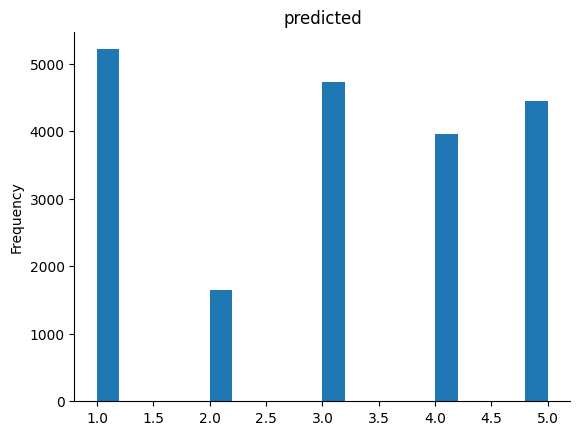

In [52]:
from matplotlib import pyplot as plt
df['predicted'].plot(kind='hist', bins=20, title='predicted')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [54]:
df.to_csv('q2_submission.csv', index=False)